## Fisher's linear discriminant

### Libreries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Function

In [2]:
def fisher_discriminant(X, labels, R):
    
    D = np.size(X, axis=1) # Dimensionality
    
    Ck = np.unique(labels) # Classes
    K = len(Ck) # Number of classes

    mk = [] # Mean of the examples of specific class
    m = np.mean(X, axis=0) # Mean of total dataset
    
    Sk = []
    Nk = np.zeros(K, dtype=np.int8) # Number of examples in class Ck

    SW = np.zeros((D, D), dtype=np.float32) # Within-class covariance matrix
    SB = np.zeros((D, D), dtype=np.float32) # Between-class covariance matrix
    
    for k in Ck:

        Xc = X[labels==k]
        Sk.append(np.cov(Xc.T))
        mk.append(np.mean(Xc, 0))
        Nk[k] = len(Xc)

    for k in Ck:

        SW += Sk[k]
        temp = mk[k]-m
        temp.shape = (D, 1)
        SB += np.dot(Nk[k], temp*temp.T)

    invSw = np.linalg.pinv(SW)
    invSw_by_SB = np.dot(invSw, SB)

    eigenvalues, eigenvectors = np.linalg.eig(invSw_by_SB)

    sort_eigval = np.argsort(eigenvalues)[::-1]
    sort_eigval_index = np.argsort(eigenvalues)[::-1]

    W = eigenvectors[:, sort_eigval_index[0:R]] # Weight matrix

    Y = np.dot(W.T, X.T)
    Y = Y.T # Projected data
    
    return Y

### Dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
labels = iris.target

In [4]:
print('Features shape:', X.shape)
print('Labels shape:', labels.shape)

Features shape: (150, 4)
Labels shape: (150,)


In [5]:
classes = ['Setosa', 'Versicolour', 'Virginica']

print('Labels:', np.unique(labels))

Labels: [0 1 2]


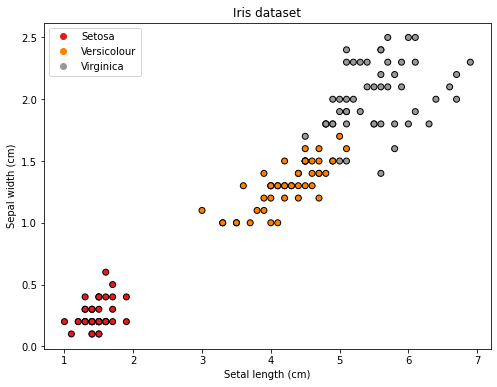

In [6]:
plt.figure(2, figsize=(8, 6))
plt.clf()

scatter = plt.scatter(X[:, 2], X[:, 3], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Setal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Iris dataset')

plt.show()

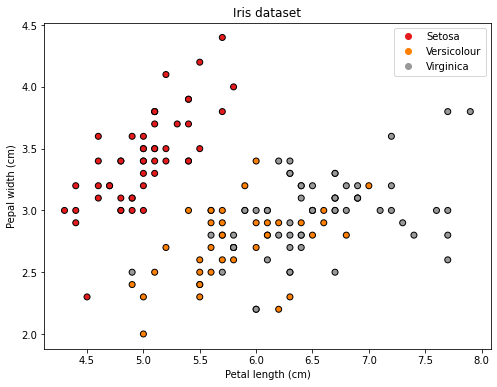

In [7]:
plt.figure(2, figsize=(8, 6))
plt.clf()

scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length (cm)")
plt.ylabel("Pepal width (cm)")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Iris dataset')

plt.show()

### Results

In [8]:
Y = fisher_discriminant(X, labels, R=2)

print('Demensionality reduction')
print('Old dimensionality:', X.shape[1])
print('New dimensionality:', Y.shape[1])

Demensionality reduction
Old dimensionality: 4
New dimensionality: 2


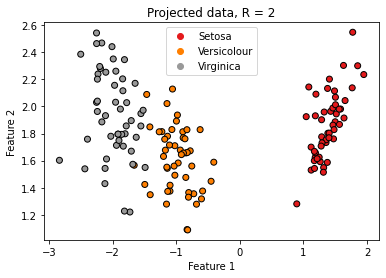

In [9]:
scatter = plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Projected data, R = 2')

plt.show()

In [10]:
Y2 = fisher_discriminant(X, labels, R=1)

print('Demensionality reduction')
print('Old dimensionality:', X.shape[1])
print('New dimensionality:', Y2.shape[1])

Demensionality reduction
Old dimensionality: 4
New dimensionality: 1


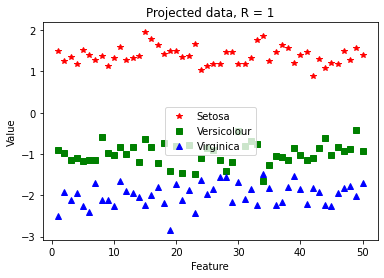

In [11]:
x_axis = np.arange(1, 51)

plt.plot(x_axis, Y2[0:50], 'r*')
plt.plot(x_axis, Y2[50:100], 'gs')
plt.plot(x_axis, Y2[100:150], 'b^')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend(classes)
plt.title('Projected data, R = 1')

plt.show()